In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential, optimizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
#reshaping
x_train= x_train.reshape(len(x_train), 32,32,3)
x_test= x_test.reshape(len(x_test), 32,32,3)
y_train= y_train.reshape(-1,)
y_test= y_test.reshape(-1,)

In [5]:
#scaling
x_train= x_train/255.0
x_test= x_test/255.0

In [6]:
classes= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [7]:
def show_img(x, y, index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

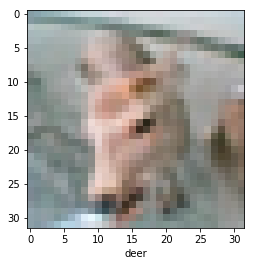

In [8]:
show_img(x_test, y_test, 58)

In [11]:
model= Sequential([
        
        layers.Conv2D(filters= 24, kernel_size=(3,3), activation= 'relu', input_shape=(x_train.shape[1:]), name='conv1'),
        layers.MaxPool2D(pool_size=(2,2), padding='valid', name='max1'),
        layers.Dropout(0.2),  # avoiding overfitting
    
        layers.Conv2D(filters= 44, kernel_size=(3,3), activation= 'relu', input_shape=(x_train.shape[1:]), name='conv2'),
        layers.MaxPool2D(pool_size=(2,2), padding='same', name='max2'),
        layers.Dropout(0.5),
        
        layers.Flatten(),
        layers.Dense(units=2000, activation='relu', name='dense1'),
        
        layers.Dense(units=10, activation='softmax', name='dense2')
])
        
    

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 30, 30, 24)        672       
_________________________________________________________________
max1 (MaxPooling2D)          (None, 15, 15, 24)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 13, 13, 44)        9548      
_________________________________________________________________
max2 (MaxPooling2D)          (None, 7, 7, 44)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 44)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2156)              0         
_________________________________________________________________
dense1 (Dense)               (None, 2000)              4

In [13]:
model.compile(optimizer= optimizers.Adam(1e-3),
             loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [15]:
# simple early stopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [16]:
history3= model.fit(x_train, y_train, 
                   epochs=12, 
                   batch_size=32, 
                   validation_split=0.1,
                   verbose = 1,
                   shuffle=True,
                   callbacks=[es])

Epoch 1/12
1407/1407 [==============================] - 85s 60ms/step - loss: 1.4789 - accuracy: 0.4666 - val_loss: 1.2362 - val_accuracy: 0.5696
Epoch 2/12
1407/1407 [==============================] - 84s 60ms/step - loss: 1.1862 - accuracy: 0.5750 - val_loss: 1.0094 - val_accuracy: 0.6544
Epoch 3/12
1407/1407 [==============================] - 85s 60ms/step - loss: 1.0265 - accuracy: 0.6374 - val_loss: 0.8930 - val_accuracy: 0.6902
Epoch 4/12
1407/1407 [==============================] - 85s 61ms/step - loss: 0.9154 - accuracy: 0.6779 - val_loss: 0.8541 - val_accuracy: 0.7072
Epoch 5/12
1407/1407 [==============================] - 85s 61ms/step - loss: 0.8036 - accuracy: 0.7186 - val_loss: 0.8060 - val_accuracy: 0.7212
Epoch 6/12
1407/1407 [==============================] - 85s 61ms/step - loss: 0.7128 - accuracy: 0.7501 - val_loss: 0.7782 - val_accuracy: 0.7312
Epoch 7/12
1407/1407 [==============================] - 86s 61ms/step - loss: 0.6331 - accuracy: 0.7787 - val_loss: 0.7772 -

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.8050 - accuracy: 0.7276


[0.8050424456596375, 0.7275999784469604]

In [18]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [19]:
y_pred= model.predict(x_test)

In [20]:
y_pred_classes = [np.argmax(x) for x in y_pred]
y_pred_classes[:5]

[3, 8, 8, 0, 4]

In [21]:
from sklearn.metrics import classification_report
print('Classification report: \n', classification_report(y_test, y_pred_classes))

Classification report: 
              precision    recall  f1-score   support

          0       0.78      0.75      0.77      1000
          1       0.82      0.86      0.84      1000
          2       0.71      0.55      0.62      1000
          3       0.52      0.55      0.53      1000
          4       0.68      0.69      0.68      1000
          5       0.62      0.61      0.62      1000
          6       0.75      0.84      0.79      1000
          7       0.76      0.81      0.78      1000
          8       0.86      0.80      0.83      1000
          9       0.78      0.83      0.80      1000

avg / total       0.73      0.73      0.73     10000



In [29]:
hist_frame = pd.DataFrame(history3.history)

In [30]:
hist_frame 

,loss,accuracy,val_loss,val_accuracy
0,1.478896,0.466578,1.236161,0.5696
1,1.186162,0.575022,1.009406,0.6544
2,1.026514,0.637400,0.893013,0.6902
3,0.915437,0.677933,0.854113,0.7072
4,0.803595,0.718600,0.806001,0.7212
5,0.712770,0.750111,0.778199,0.7312
6,0.633140,0.778733,0.777191,0.7276
7,0.563240,0.802467,0.771741,0.7362
8,0.502114,0.825044,0.772597,0.7384


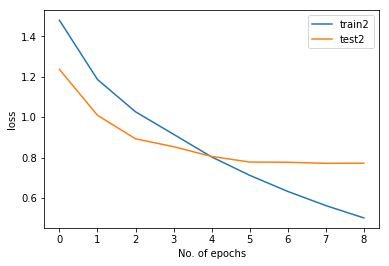

In [32]:
plt.plot(hist_frame['loss'], label='train2')
plt.plot(hist_frame ['val_loss'], label='test2')
plt.xlabel('No. of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

The training stopped early because the TEST_LOSS(validation loss) was becoming a plateau i.e. wasn't changing much.

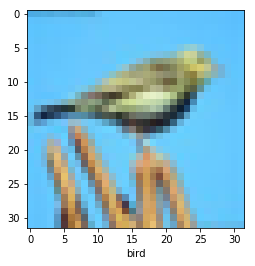

In [36]:
show_img(x_test, y_test, 67)

In [37]:
classes[y_pred_classes[67]]

'bird'

In [ ]:
# saving the model
model.save('cifar_model.h5')